In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [176]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Part 1：Data Preprocessing
### we download and read the data first. From the information, we can say there is no missing value. But some columns have the value of 'unknown', we should explore further to see if we should drop those rows.

In [177]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science2/archive (2)/train.csv',sep=';')

In [178]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [179]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [180]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### let's check those columns with the value of 'unknown'.

education  primary  secondary  tertiary  unknown
y                                               
no            6260      20752     11305     1605
yes            591       2450      1996      252


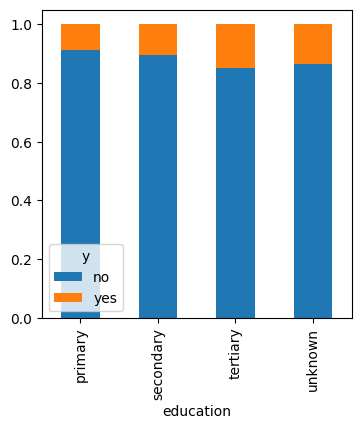

poutcome  failure  other  success  unknown
y                                         
no           4283   1533      533    33573
yes           618    307      978     3386


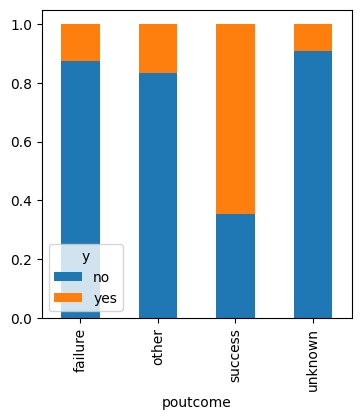

contact  cellular  telephone  unknown
y                                    
no          24916       2516    12490
yes          4369        390      530


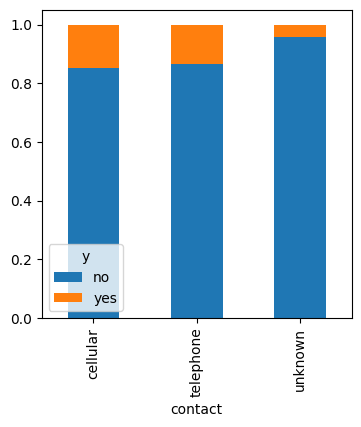

job  admin.  blue-collar  entrepreneur  housemaid  management  retired   
y                                                                        
no     4540         9024          1364       1131        8157     1748  \
yes     631          708           123        109        1301      516   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1392      3785      669        6757        1101      254  
yes            187       369      269         840         202       34  


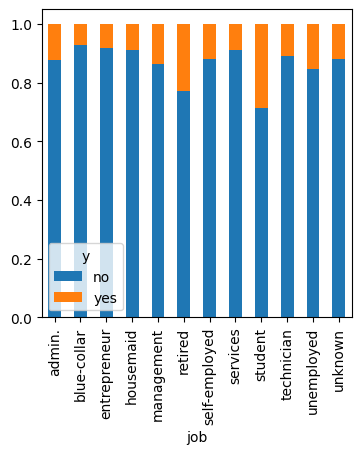

In [181]:
for i in ['education','poutcome','contact','job']:
    print(df.groupby(['y',i])['age'].count().unstack())
    df.groupby([i])['y'].value_counts(normalize=True).unstack().plot.bar(stacked=True, figsize=(4,4))
    plt.show()

### From the charts, for the 'education' and 'job' columns,we can drop the rows with 'unknown' since their proportion are less than 10%.
### for the 'poutcome' column, we can merge the 'unknown' with 'others'; for the 'contact' column, we can stay the same since the 'unknown' can represent the other contanct way other than phone and cellular.

In [182]:
# drop the 'unknown' value of 'job' and 'education' column
to_drop = list(df[df['job']=='unknown'].index.values) + list(df[df['education']=='unknown'].index.values)
df.drop(to_drop, axis=0, inplace=True)

# merge the column based on certain value
df['poutcome'] = df['poutcome'].apply(lambda x: 'other' if x == 'unknown' else x)

### it's easy to identify our target value is 'y'. We should turn the type of 'y', originally whoes type are object, into numberic before we go to the next step. And since the target valus is quite imbalance so we need to use the 'SMOTE' when building the pipeline for the models.

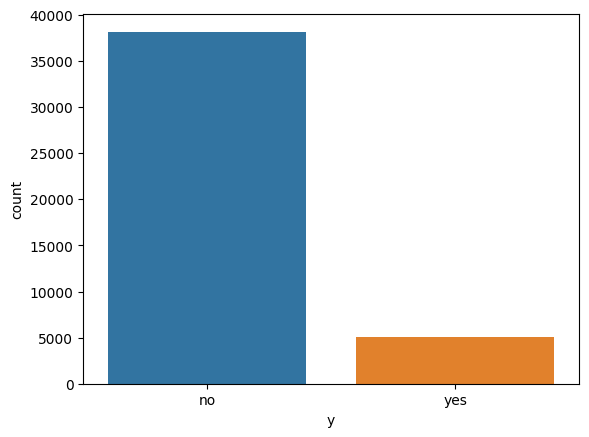

In [183]:
sns.countplot(x='y', data=df)
plt.show()

In [184]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}).astype(int)

### Let's check the numberic columns to identify and drop the outliers.

<Axes: xlabel='y', ylabel='age'>

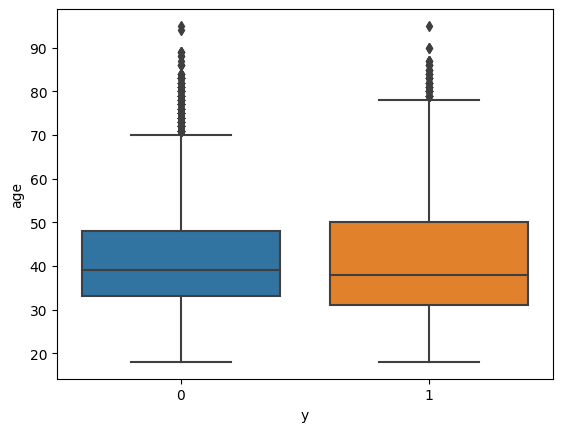

In [185]:
sns.boxplot(x='y', y='age', data=df) 

In [186]:
age_outliers=df[df['age']>80].index
df.drop(age_outliers,inplace=True)

<Axes: xlabel='y', ylabel='day'>

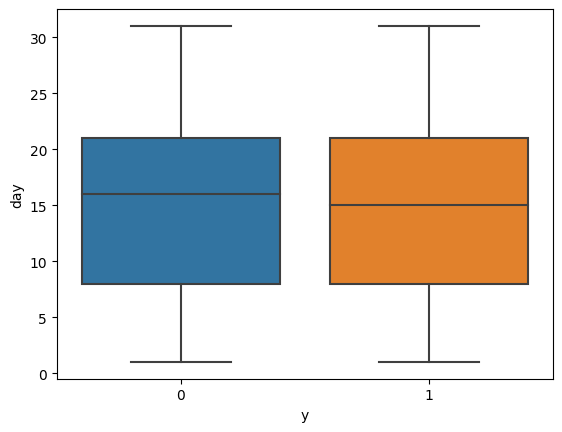

In [187]:
sns.boxplot(x='y', y='day', data=df) 

<Axes: xlabel='y', ylabel='balance'>

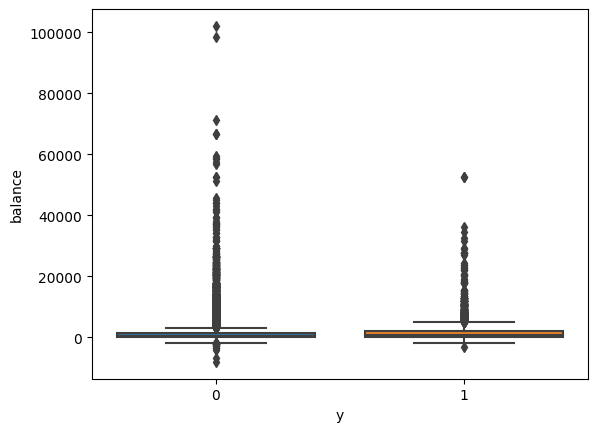

In [188]:
sns.boxplot(x='y', y='balance', data=df) 

In [189]:
balance_outliers=df[df['balance']>60000].index
df.drop(balance_outliers,inplace=True)

<Axes: xlabel='y', ylabel='duration'>

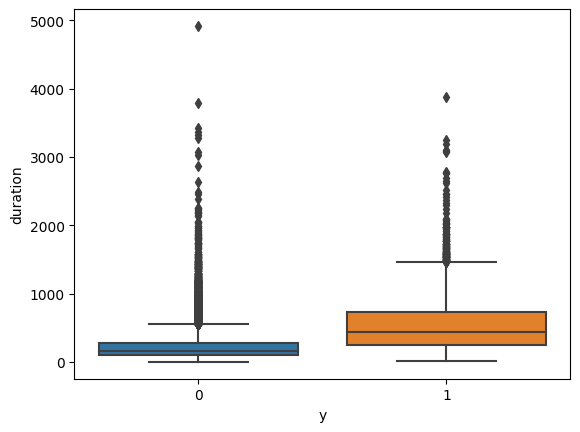

In [190]:
sns.boxplot(x='y', y='duration', data=df) 

In [191]:
duration_outliers=df[df['duration']>3500].index
df.drop(duration_outliers,inplace=True)

<Axes: xlabel='y', ylabel='campaign'>

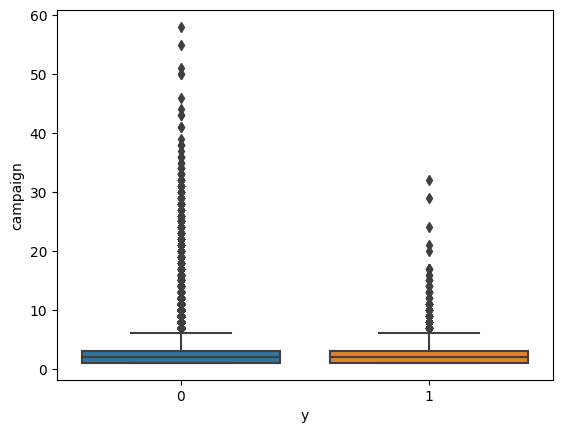

In [192]:
sns.boxplot(x='y', y='campaign', data=df) 

In [193]:
campaign_outliers=df[df['campaign']>50].index
df.drop(campaign_outliers,inplace=True)

In [194]:
df.info()# We have dropped over 1000 rows and that will be ok since these are less than 10% of the original dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 43094 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43094 non-null  int64 
 1   job        43094 non-null  object
 2   marital    43094 non-null  object
 3   education  43094 non-null  object
 4   default    43094 non-null  object
 5   balance    43094 non-null  int64 
 6   housing    43094 non-null  object
 7   loan       43094 non-null  object
 8   contact    43094 non-null  object
 9   day        43094 non-null  int64 
 10  month      43094 non-null  object
 11  duration   43094 non-null  int64 
 12  campaign   43094 non-null  int64 
 13  pdays      43094 non-null  int64 
 14  previous   43094 non-null  int64 
 15  poutcome   43094 non-null  object
 16  y          43094 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


### check the distribution of the categorical column to see if the varible is significant to the target value 'y': 

In [195]:
df_marital = df.groupby(['y','marital'])[['age']].count().unstack()
df_marital

age               
marital divorced married single
y                              
0           4410   23309  10394
1            584    2579   1818

### the'marital' variable's ditribution shows that it might be a significant variable.

In [196]:
df_job = df.groupby(['y','job'])[['age']].count().unstack()
df_job

age                                                         
job admin. blue-collar entrepreneur housemaid management retired   
y                                                                  
0     4387        8602         1295      1085       7958    1615  \
1      613         675          115       104       1252     449   

                                                          
job self-employed services student technician unemployed  
y                                                         
0            1358     3653     549       6535       1076  
1             182      350     226        817        198

### the distribution of the 'job' shows obvious differences in the target value so it should be a significant variable.

In [197]:
df_education = df.groupby(['y','education'])[['age']].count().unstack()
df_education

age                   
education primary secondary tertiary
y                                   
0            6178     20678    11257
1             560      2432     1989

### the education level has a slight influence in the target value.

In [198]:
df_default = df.groupby(['y','default'])[['age']].count().unstack()
df_default

age     
default     no  yes
y                  
0        37379  734
1         4933   48

### the variable 'default' should be a significant variable since people with a record of default subscribe a deposite at a higher rate than those without a record of default

In [199]:
df_housing = df.groupby(['y','housing'])[['age']].count().unstack()
df_housing

age       
housing     no    yes
y                    
0        15699  22414
1         3107   1874

### the variable 'housing' should be a significant variable since people without house loan subscribe a deposite at a higher rate than those who have alread had a house loan.

In [200]:
df_loan= df.groupby(['y','loan'])[['age']].count().unstack()
df_loan

age      
loan     no   yes
y                
0     31479  6634
1      4508   473

### the variable 'loan' should be a significant variable since people without a personal loan subscribe a deposite at a higher rate than those who have alread had one.

In [201]:
df_contact = df.groupby(['y','contact'])[['age']].count().unstack()
df_contact

age                  
contact cellular telephone unknown
y                                 
0          24024      2315   11774
1           4150       324     507

### the variable 'contact' can be considered as a significant variable since the 'unknown' has a slightly different distribution.

In [202]:
df_month = df.groupby(['y','month'])[['age']].count().unstack()
df_month

age                                                               
month   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
y                                                                         
0      2274  5367  104  2110  1184  6013  4454  202  12300  3449  385  271
1       539   657   90   414   129   582   521  236    887   388  292  246

### the variable 'month' will be a significant variable because it shows that distribution of the target value is quite different between different month.

In [203]:
df_poutcome = df.groupby(['y','poutcome'])[['age']].count().unstack()
df_poutcome

age               
poutcome failure  other success
y                              
0           4115  33494     504
1            584   3486     911

### the variable 'poutcome' will be a significant variable because it shows that distribution of the target value is quite different between 'sucess' and the other ones.

### Summary of data cleaning and exploring: 
### 1. For the numberic columns, we remove some outliers based on the proportion of outliers in the database；
### 2. For the categorical columns, we decide whether to remove or merge the 'unknown' value based on what they might mean and whether the variable has a significant impact.
### 3. We check the distribution of the categorical variables to see whether they have significant impact on the target value. And we can say that all variables have varying degrees of influence on the target value 'y' so we can put all of them into the models.

### Part 2 Build baseline Models:
### now let's start to build the models and compare the models.Firstly, we should split the data into testing and trainning data.

In [204]:
y = df['y']
X = df.drop('y', axis=1)

In [205]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [206]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])



In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [208]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)

In [209]:
# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

### then we build the baseline models using logistic regression and KNN.

In [210]:
knn = KNeighborsClassifier()
log = LogisticRegression()

In [211]:
knn.fit(X_resampled, y_resampled)
log.fit(X_resampled, y_resampled)

LogisticRegression()

In [212]:
pred_knn = knn.predict(X_test_transformed)
pred_log = log.predict(X_test_transformed)

In [213]:
print(f1_score(y_test,pred_knn))
print(f1_score(y_test,pred_log))
print(precision_score(y_test,pred_knn))
print(precision_score(y_test,pred_log))

0.5316275764036957
0.5677065478231059
0.40696409140369966
0.4265842349304482


In [214]:
cv_scores_knn = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='f1')
cv_scores_log = cross_val_score(log, X_resampled, y_resampled, cv=10, scoring='f1')
print(cv_scores_knn)
print(cv_scores_log)

[0.93101324 0.92808062 0.9307598  0.92833181 0.93591517 0.93014706
 0.92864782 0.92540046 0.93668156 0.93011164]
[0.82890756 0.83752482 0.8442178  0.85041186 0.8475418  0.83601709
 0.84320786 0.84086057 0.84662577 0.84620484]


### the precision score is not good so we should tune the model to make it better.

In [215]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log
}

In [216]:
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}

In [217]:
params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params
}

tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('smote',SMOTE()),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

                                        Best Params Precision    Recall   
K-Nearest Neighbors  {'classifier__n_neighbors': 3}   0.42614  0.718238  \
Logistic Regression            {'classifier__C': 1}  0.424398  0.848361   

                     F1-Score   Time (s)  
K-Nearest Neighbors   0.53491  19.254492  
Logistic Regression  0.565767  12.253777  


### Part 3 Ensemble modelling:
### From the metrics we can say the both models are not good enough since the precision is lower than 0.5.And both models are time-cosuming. So let's try ensemble modelling to see if the results will be improved or not.

In [218]:

knn = KNeighborsClassifier(n_neighbors=10)
log = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log), ('knn', knn), ('dt', dt)])

In [219]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [220]:
# Create dictionary to store the results of each model
results = {}

In [221]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('smote',SMOTE()),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.404299  0.809426  0.539249  0.843369  0.640495
Logistic Regression   0.425064  0.851434  0.567042  0.852767  0.912720
Decision Tree         0.470541  0.597336  0.526411  0.878292  0.849946
Random Forest         0.588364  0.549180  0.568098  0.905441  5.320689
AdaBoost              0.478557  0.720287  0.575051  0.879452  2.610353
Bagging               0.537561  0.564549  0.550725  0.895696  3.536899
Voting                0.474940  0.815574  0.600302  0.877016  1.848434


### Part 4 Performance comparison of the different models:
* The KNN model has the lowest precision. And the F1 score is not good, accuracy is not high enough when compared to the other models, but the compute time is fastest. This model won't be a good model even though it's the most effective one.

* The Logistic Regression has better precision, recall, F1 score, and accuracy than KNN.The compute time is also acceptable.
* The Decision Tree has the better precision, recall, F1 score and accuracy and fast processing time. This is a moderate model.

* The Random Forest model is the most inefficient model of all, but the precision, recall, F1 score and accuracy are decent enough.

* AdaBoost has the decent precision, F1 score and accuracy but it's not a efficient model.

* Bagging has better precision and accuracy although the processing time is not good enough.

* Voting, which allowed us to combine models we are interested in has the lower precision. But overall is a decent metrics across the board but the efficiency yield.


Now let's tune each model and see if performance improves.

In [222]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [224]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('smote',SMOTE()),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                                           Best Params   
K-Nearest Neighbors                     {'classifier__n_neighbors': 3}  \
Logistic Regression                               {'classifier__C': 1}   
Decision Tree                            {'classifier__max_depth': 20}   
Random Forest        {'classifier__max_depth': None, 'classifier__n...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'soft'}   

                    Precision    Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.422018  0.706967  0.528533  0.857176   19.479771  
Logistic Regression   0.42644  0.849385  0.567808  0.853579   12.906492  
Decision Tree        0.463115  0.578893  0.514572   0.87632   13.077067  
Random Forest        0.587216  0.555328  0.570827  0.905441  294.227842  
AdaBoost             0.505643  0.6885

### Part 5  Interpretation and Justification 
# Q1:
# Random Forest is an ensemble method based on bagging. It creates multiple decision trees by randomly selecting subsets of the training data with replacement and then averages their predictions.It introduces feature randomness.And Random Forests are robust to outliers and noisy data points because they aggregate predictions from multiple trees.According to this dataset, it has the best performance. But Random Forest typically consists of a large number of decision trees and each tree adds to the overall training time. More trees can lead to better generalization but also increased time complexity.
# AdaBoost is a boosting ensemble method, which focuses on reducing bias. Our dataset has bias and is unbalance. AdaBoost can adapt and perform better than the KNN.
# Bagging works by training multiple base models on bootstrapped subsets of the data and then aggregating their predictions. This ensemble approach can help reduce the variance in predictions.
# Voting ensembles typically combine predictions from diverse base models. These base models may be different in terms of algorithms, parameter settings, or data subsets. The diversity among base models helps capture different patterns in the data, which can lead to improved performance.
# Q2:
# I would argue that Bagging model is the best choice for this problem for the better precision and accruacy but not the most time-consuming one. The adaboost model has the best perfomance metrics but it's also too ineffcient. And the others models with better processing time don't perform good enough.
# Q3: The decision criteria I used to arrive at this conclusion is the computational cost-performance trade-off.